**Informe del Análisis de Calidad de Datos:**

Documentar en formato markdown los resultados del análisis de calidad de los datos, identificando problemas encontrados (como valores faltantes o inconsistencias) y detallando las soluciones implementadas para garantizar la confiabilidad del análisis posterior.

In [ ]:
%run './01-EDA-cashrequest.ipynb'

In [59]:
df_cashrequest = df.copy()

1. **Integridad**  
   - Evaluación: ¿Qué proporción de las entidades tienen datos completos?  
   - Métrica: Número de valores faltantes detectados.  

Calidad de los datos:
                        Column  Non_Null_Count  Non_Null_Percentage  \
7           deleted_account_id            2104             8.777639   
8           reimbursement_date            3050            12.724239   
13             recovery_status            3330            13.892365   
15            reco_last_update            3330            13.892365   
14               reco_creation            3330            13.892365   
10             money_back_date           12040            50.229453   
6                 moderated_at           15912            66.382979   
9   cash_request_received_date           16289            67.955778   
12                     send_at           16466            68.694201   
5                      user_id           21867            91.226533   
18                      cohort           23970           100.000000   
17           transaction_month           23970           100.000000   
16              time_to_update           23970         

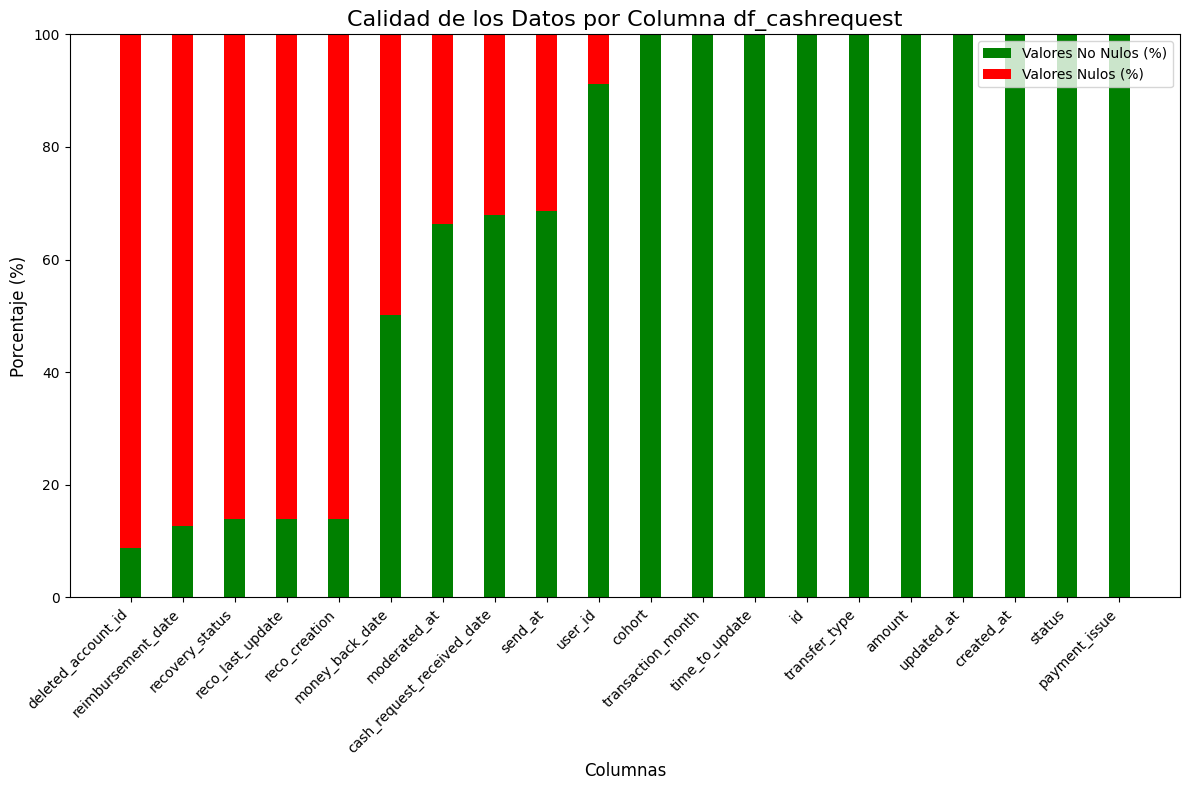

In [60]:

# Conteo de valores no nulos y nulos
total_rows = len(df_cashrequest)
null_counts = df_cashrequest.isnull().sum()
non_null_counts = total_rows - null_counts

# Creo DataFrame resumen con información de valores correctos y nulos
data_quality_summary = pd.DataFrame({
    'Column': df_cashrequest.columns,
    'Non_Null_Count': non_null_counts.values,
    'Non_Null_Percentage': (non_null_counts.values / total_rows) * 100,
    'Null_Count': null_counts.values,
    'Null_Percentage': (null_counts.values / total_rows) * 100
}).sort_values(by='Null_Count', ascending=False)

# Muestro el resumen en una tabla
print("Calidad de los datos:")
print(data_quality_summary)

# Exporto a un archivo CSV (opcional)
#output_path = "data_quality_summary.csv"
#data_quality_summary.to_csv(output_path, index=False)

# Gráfico para visualizar la calidad de los datos
plt.figure(figsize=(12, 8))
# Agrupo barras de valores nulos y no nulos
width = 0.4
x = range(len(data_quality_summary))

plt.bar(x, data_quality_summary['Non_Null_Percentage'], width, label='Valores No Nulos (%)', color='green')
plt.bar(x, data_quality_summary['Null_Percentage'], width, bottom=data_quality_summary['Non_Null_Percentage'], label='Valores Nulos (%)', color='red')

# Etiqueto
plt.title("Calidad de los Datos por Columna df_cashrequest", fontsize=16)
plt.xlabel("Columnas", fontsize=12)
plt.ylabel("Porcentaje (%)", fontsize=12)
plt.xticks(x, data_quality_summary['Column'], rotation=45, ha='right')
plt.legend()

# Muestro el gráfico
plt.tight_layout()
plt.show()

2. **Consistencia**  
   - Evaluación: ¿Qué tan consistentes son los datos en las diferentes tablas?  
   - Métrica: Número de inconsistencias encontradas en los datos.

In [61]:
df_cashrequest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          23970 non-null  int64              
 1   amount                      23970 non-null  float64            
 2   status                      23970 non-null  object             
 3   created_at                  23970 non-null  datetime64[ns, UTC]
 4   updated_at                  23970 non-null  datetime64[ns, UTC]
 5   user_id                     21867 non-null  float64            
 6   moderated_at                15912 non-null  datetime64[ns, UTC]
 7   deleted_account_id          2104 non-null   float64            
 8   reimbursement_date          3050 non-null   datetime64[ns, UTC]
 9   cash_request_received_date  16289 non-null  datetime64[ns]     
 10  money_back_date             12040 non-null  datetime64[ns,

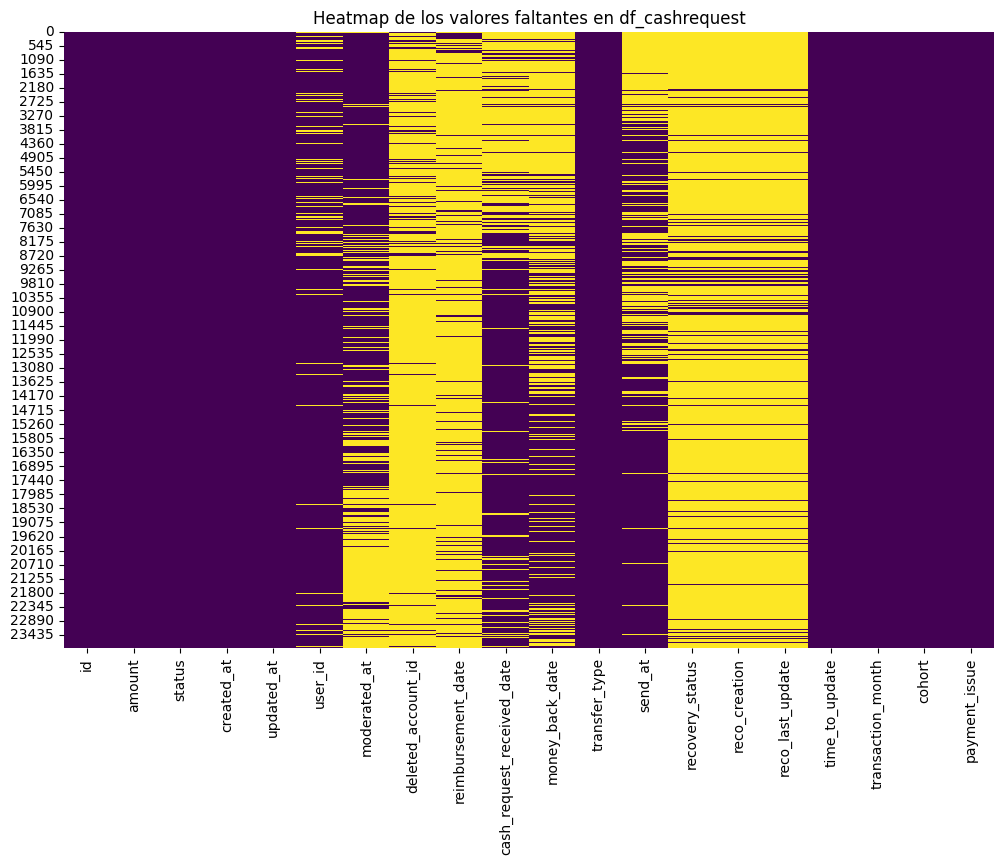

In [62]:
# Heatmap de valores faltantes
plt.figure(figsize=(12, 8))
sns.heatmap(df_cashrequest.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap de los valores faltantes en df_cashrequest")
plt.show()

Analisis de los valores faltantes

Inspección de las columnas:

Columnas con bastantes valores faltantes: moderated_at, deleted_account_id, reimbursement_date, money_back_date, recovery_status, reco_creation, reco_last_update.

Columnas con algunos valores faltantes: user_id, cash_request_received_date, send_at.

Conexto de los datos:
Para columnas con fecha, se intenta completar según la lógica (e.g., created_at).
Para columnas categóricas (recovery_status, transfer_type), se usa el valor más utilizado, o se apartan.
Para columnas numericas (time_to_update, amount), se usan modelos estadisticos como la media, la mediana o interpolación.

Al observar la gráfica y los patrones de los valores faltantes, podemos identificar agrupaciones lógicas y casuísticas basadas en el nombre de las columnas y su relación. Aquí se detallan las posibles agrupaciones que explican los datos vacíos:

1. Datos relacionados con cuentas eliminadas o moderadas:
Si deleted_account_id tiene un valor, es probable que moderated_at también lo tenga. Los valores nulos en estas columnas podrían reflejar que:
La cuenta no ha sido eliminada ni moderada, por lo tanto, estos datos no aplican.
- Casuística: "Solo aplica a cuentas eliminadas o moderadas".

2. Fechas relacionadas con transacciones
reimbursement_date, cash_request_received_date, money_back_date, send_at:
Estas fechas están asociadas a transacciones o solicitudes específicas.
La ausencia de una solicitud de reembolso o devolución.
- Casuística: "Fechas dependientes de una acción previa (reembolso, solicitud, etc.)".

3. Estados de recuperación y recomendaciones
recovery_status, reco_creation, reco_last_update:
- Los valores en estas columnas son relevantes solo si el caso pasó por un proceso de recuperación o recomendación.
Los valores nulos podrían reflejar:
Que la cuenta o transacción no tuvo problemas o no requirió recuperación.
Que no hay recomendación asociada.
- Casuística: "Solo aplica a casos con problemas de recuperación o recomendaciones activas".

4. Identificadores y usuarios
user_id:
- Casuística: "Datos faltantes para usuarios no identificados".

5. Variables generales:
transfer_type, payment_issue, status:
Estas columnas parecen completas y probablemente funcionan como "anclas" para las casuísticas mencionadas. Por ejemplo:
Ciertos tipos de transfer_type podrían implicar la falta de fechas como reimbursement_date o cash_request_received_date.
El estado de payment_issue puede justificar valores faltantes en columnas relacionadas con recuperación.


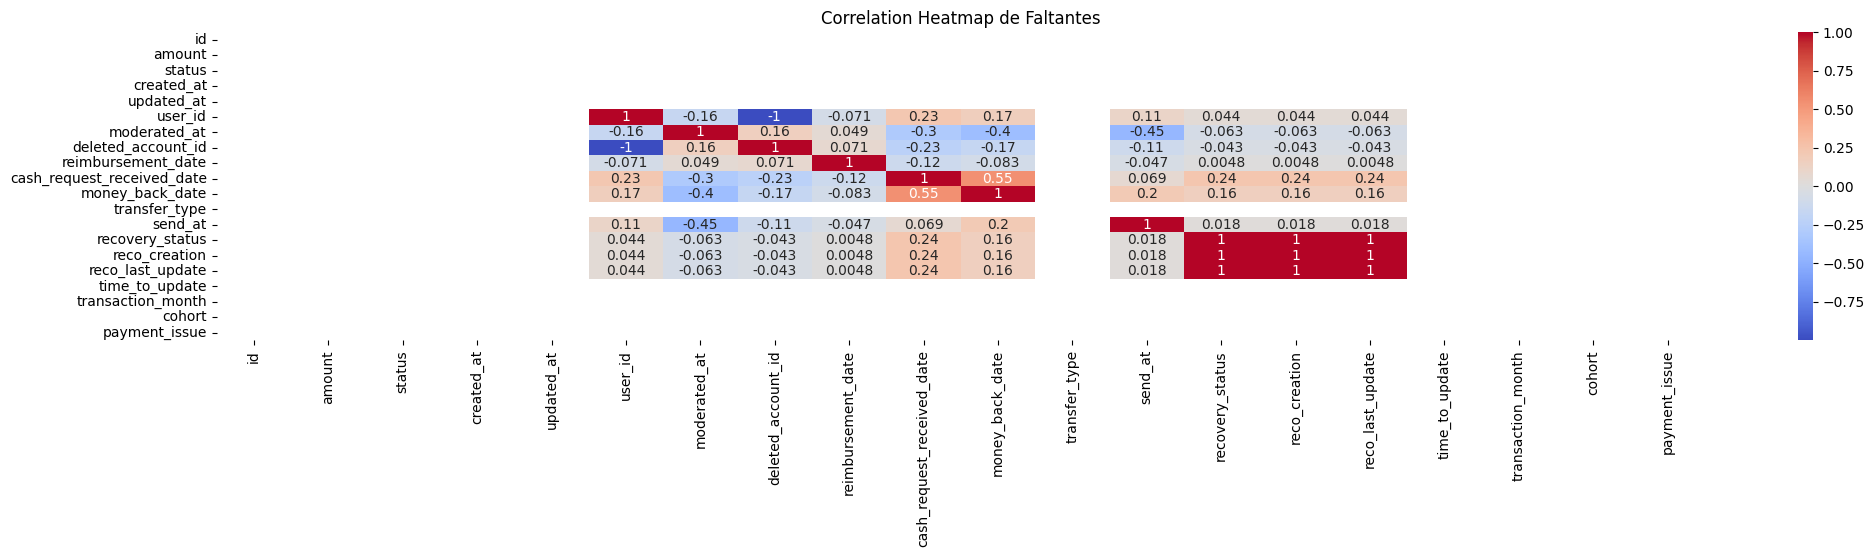

In [63]:
# Binary DataFrame para valores faltantes
missing_binary = df_cashrequest.isnull().astype(int)

# Correlacion de faltantes
missing_corr = missing_binary.corr()

plt.figure(figsize=(24, 4))
sns.heatmap(missing_corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap de Faltantes")
plt.show()


- Fuerte correlación positiva (valores cercanos a 1):

deleted_account_id y moderated_at tienen una correlación alta de faltantes, lo que sugiere que si una columna tiene un valor nulo, es probable que la otra también lo tenga.

money_back_date y transfer_type también están correlacionadas positivamente. Esto puede reflejar una dependencia entre estas columnas en términos de datos faltantes.

- Correlación negativa (valores cercanos a -1):

id y moderated_at presentan una correlación negativa significativa (-0.16). Esto implica que si una columna tiene un valor presente, es probable que la otra tenga un faltante.

3. **Relevancia / Auditabilidad**  
   - Evaluación: ¿Qué tan relevantes son los datos proporcionados para las entidades analizadas?  
   - Métrica: Número de valores irrelevantes o no auditables.  

In [64]:
# Crear un DataFrame binario para faltantes de las columnas con alta correlación
missing_deleted_account_id = df_cashrequest['deleted_account_id'].isnull().astype(int)
missing_moderated_at = df_cashrequest['moderated_at'].isnull().astype(int)

# Crear una tabla cruzada
missing_crosstab = pd.crosstab(missing_deleted_account_id, missing_moderated_at, rownames=['Deleted Account ID Missing'], colnames=['Moderated At Missing'])

# Mostrar la tabla
print("Tabla cruzada de faltantes entre 'deleted_account_id' y 'moderated_at':")
print(missing_crosstab)


Tabla cruzada de faltantes entre 'deleted_account_id' y 'moderated_at':
Moderated At Missing            0     1
Deleted Account ID Missing             
0                            1914   190
1                           13998  7868


Aunque haya una alta correlación entre 'deleted_account_id' y 'moderated_at':

Valores nulos en estas columnas son esperados en ciertos casos:

- moderated_at será nulo si la solicitud no necesita revisión manual.
- deleted_account_id será nulo para usuarios activos.

In [65]:
#Relevancia y auditabilidad en CashRequest
irrelevant_status_cashrequest = df_cashrequest[~df_cashrequest['status'].isin(['rejected', 'money_back', 'canceled', 'active',
       'direct_debit_rejected', 'transaction_declined',
       'direct_debit_sent'])] if 'status' in df_cashrequest.columns else None
negative_amounts_cashrequest = df_cashrequest[df_cashrequest['amount'] < 0] if 'amount' in df_cashrequest.columns else None

# Métrica
relevance_auditability = {
    "CashRequest Irrelevant Status Count": len(irrelevant_status_cashrequest) if irrelevant_status_cashrequest is not None else 0,
    "CashRequest Negative Amount Count": len(negative_amounts_cashrequest) if negative_amounts_cashrequest is not None else 0,
}

print("Relevancia y Auditabilidad:", relevance_auditability)

Relevancia y Auditabilidad: {'CashRequest Irrelevant Status Count': 0, 'CashRequest Negative Amount Count': 0}


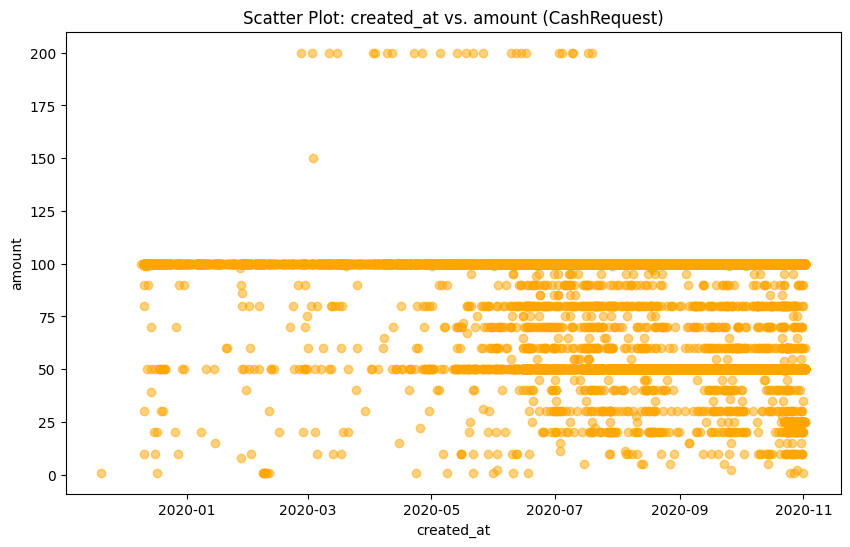

In [66]:
if 'created_at' in df_cashrequest.columns and 'amount' in df_cashrequest.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(df_cashrequest['created_at'], df_cashrequest['amount'], alpha=0.5, color='orange')
    plt.title("Scatter Plot: created_at vs. amount (CashRequest)")
    plt.xlabel("created_at")
    plt.ylabel("amount")
    plt.show()


Correlación de faltantes

In [67]:
# Crear un DataFrame binario para faltantes de las columnas con alta correlación
missing_deleted_account_id = df_cashrequest['deleted_account_id'].isnull().astype(int)
missing_moderated_at = df_cashrequest['moderated_at'].isnull().astype(int)

# Crear una tabla cruzada
missing_crosstab = pd.crosstab(missing_deleted_account_id, missing_moderated_at, rownames=['Deleted Account ID Missing'], colnames=['Moderated At Missing'])

# Mostrar la tabla
print("Tabla cruzada de faltantes entre 'deleted_account_id' y 'moderated_at':")
print(missing_crosstab)


Tabla cruzada de faltantes entre 'deleted_account_id' y 'moderated_at':
Moderated At Missing            0     1
Deleted Account ID Missing             
0                            1914   190
1                           13998  7868


4. **Unicidad**  
   - Evaluación: ¿Qué tan únicos son los datos?
   - Métrica: Número de valores duplicados detectados.

In [68]:
cashrequest_duplicates = df_cashrequest.duplicated().sum()
print(f"Duplicados en CashRequest: {cashrequest_duplicates}")

Duplicados en CashRequest: 0


5. **Validez**  
   - Evaluación: ¿Cumplen los datos con los valores permitidos?  
   - Métrica: Número de valores fuera de rango o inválidos.  

In [70]:
invalid_cashrequest_amount = df_cashrequest[df_cashrequest['amount'] < 0]
print(f"Montos inválidos en CashRequest: {len(invalid_cashrequest_amount)}")


Montos inválidos en CashRequest: 0


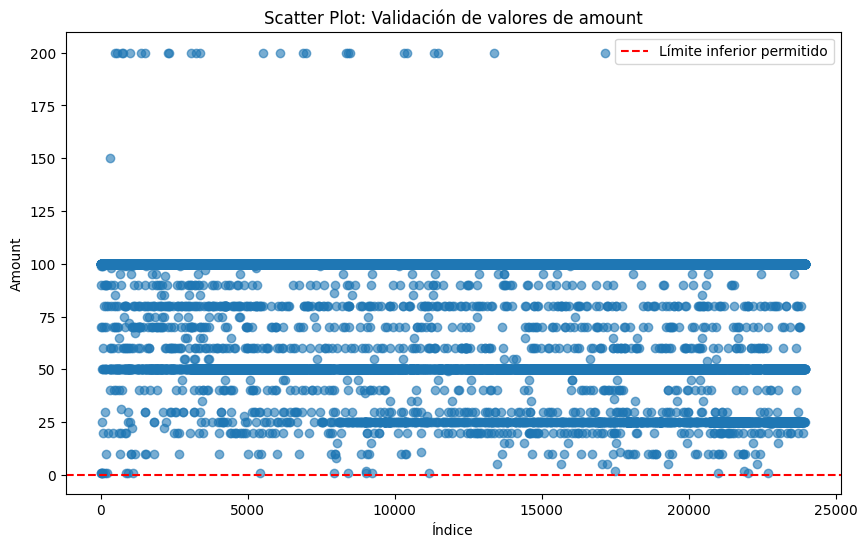

In [71]:
# Scatter plot para `amount` en función del índice (para detectar valores fuera de rango)
plt.figure(figsize=(10, 6))
plt.scatter(df_cashrequest.index, df_cashrequest['amount'], alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', label='Límite inferior permitido')
plt.title('Scatter Plot: Validación de valores de amount')
plt.xlabel('Índice')
plt.ylabel('Amount')
plt.legend()
plt.show()

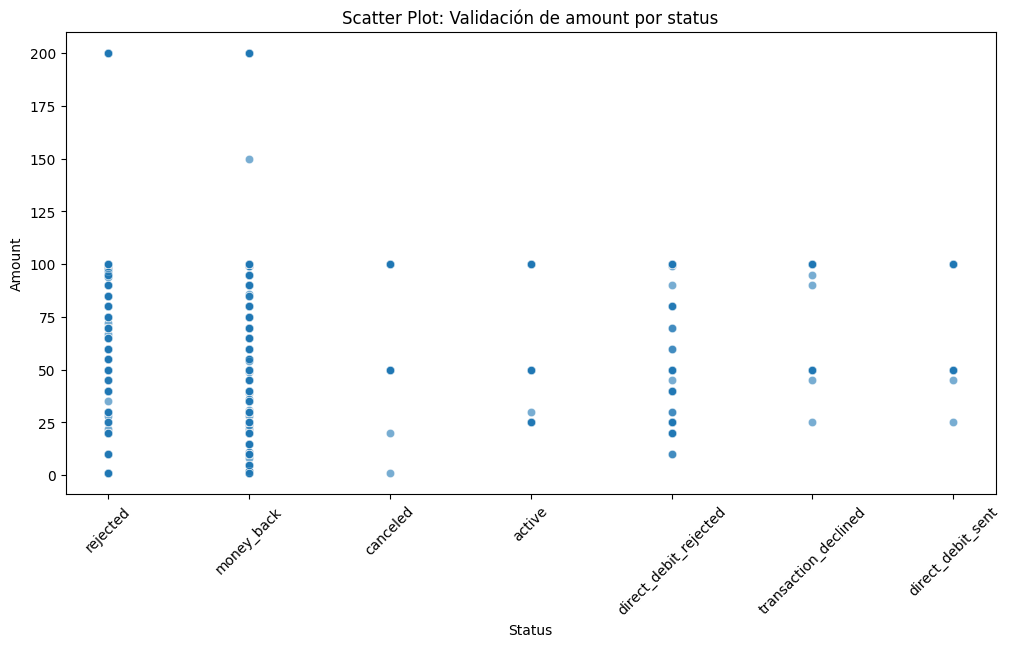

In [72]:
import seaborn as sns

# Scatter plot para `amount` agrupado por `status`
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_cashrequest, x='status', y='amount', alpha=0.6)
plt.title('Scatter Plot: Validación de amount por status')
plt.xlabel('Status')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()


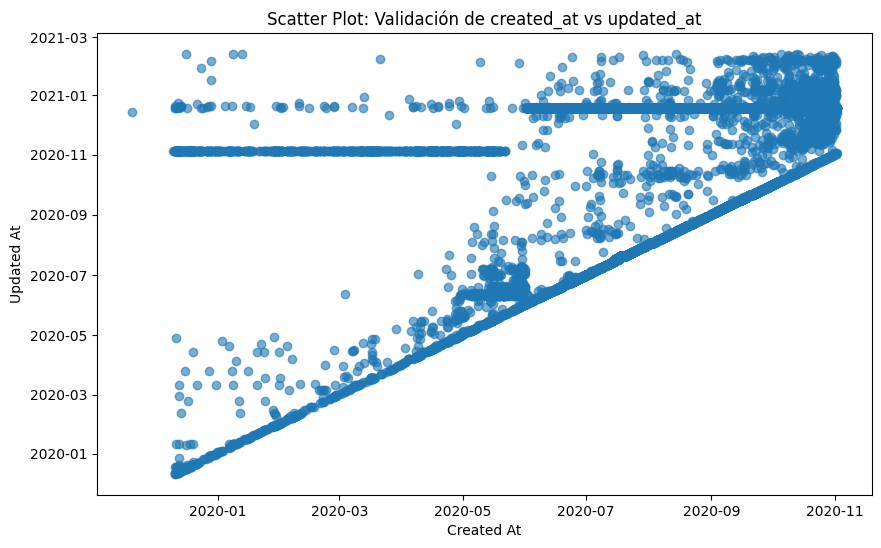

In [73]:
# Scatter plot para comparar `created_at` vs. `updated_at`
plt.figure(figsize=(10, 6))
plt.scatter(df_cashrequest['created_at'], df_cashrequest['updated_at'], alpha=0.6)
plt.title('Scatter Plot: Validación de created_at vs updated_at')
plt.xlabel('Created At')
plt.ylabel('Updated At')
plt.show()


In [81]:
outliers = df_cashrequest[df_cashrequest['updated_at'] < df_cashrequest['created_at']]
print(outliers)

Empty DataFrame
Columns: [id, amount, status, created_at, updated_at, user_id, moderated_at, deleted_account_id, reimbursement_date, cash_request_received_date, money_back_date, transfer_type, send_at, recovery_status, reco_creation, reco_last_update, time_to_update, transaction_month, cohort, payment_issue, recovery_status_encoded, transfer_type_encoded, status_encoded, payment_issue_encoded]
Index: []

[0 rows x 24 columns]


6. **Integridad estructural**  
   - Evaluación: Revisar el formato y estructura de los datos 
   - Métrica: Transformar el dataset para su uso en modelos personalizados.

Convertir las variables categóricas en numéricas a travez de Label Encoding

In [ ]:
# Convertir `recovery_status` en variable numérica (Label Encoding)
cr_recovery_status_mapping = {
    'completed': 0,
    'pending': 1,
    'pending_direct_debit': 2,
    'cancelled': 3,
    np.nan: 4  # Tratar Nan como categoria aparte
}

# Convertir `transfer_type` en variable numérica (Label Encoding)
cr_transfer_type_mapping = {
    'regular': 0,
    'instant': 1
}

# Convertir `status` en variable numérica (Label Encoding)
cr_status_mapping = {
    'rejected':0,
    'money_back':1, 
    'canceled':2,
    'active':3,
    'direct_debit_rejected':4,
    'transaction_declined':5,
    'direct_debit_sent':6
}

# Convertir `payment` en variable numérica (Label Encoding)
cr_payment_mapping = {
    'True':0,
    'False':1
}


# Aplicar el mapping a la columna
df_cashrequest['recovery_status_encoded'] = df_cashrequest['recovery_status'].map(cr_recovery_status_mapping)
df_cashrequest['transfer_type_encoded'] = df_cashrequest['transfer_type'].map(cr_transfer_type_mapping)
df_cashrequest['status_encoded'] = df_cashrequest['status'].map(cr_status_mapping)
df_cashrequest['payment_issue_encoded'] = df_cashrequest['payment_issue'].map(cr_status_mapping)
df_cashrequest['status_encoded'] = df_cashrequest['status'].map(cr_status_mapping)

In [76]:
# Convertir payment_issue en variable numerica
df_cashrequest['payment_issue_encoded'] = df['payment_issue'].astype(int)

In [77]:
# Convert 'cash_request_received_date' to UTC (timezone-aware)
df_cashrequest['cash_request_received_date'] = df_cashrequest['cash_request_received_date'].dt.tz_localize('UTC')

In [78]:
df_cashrequest['payment_issue'].unique()

array([False,  True])

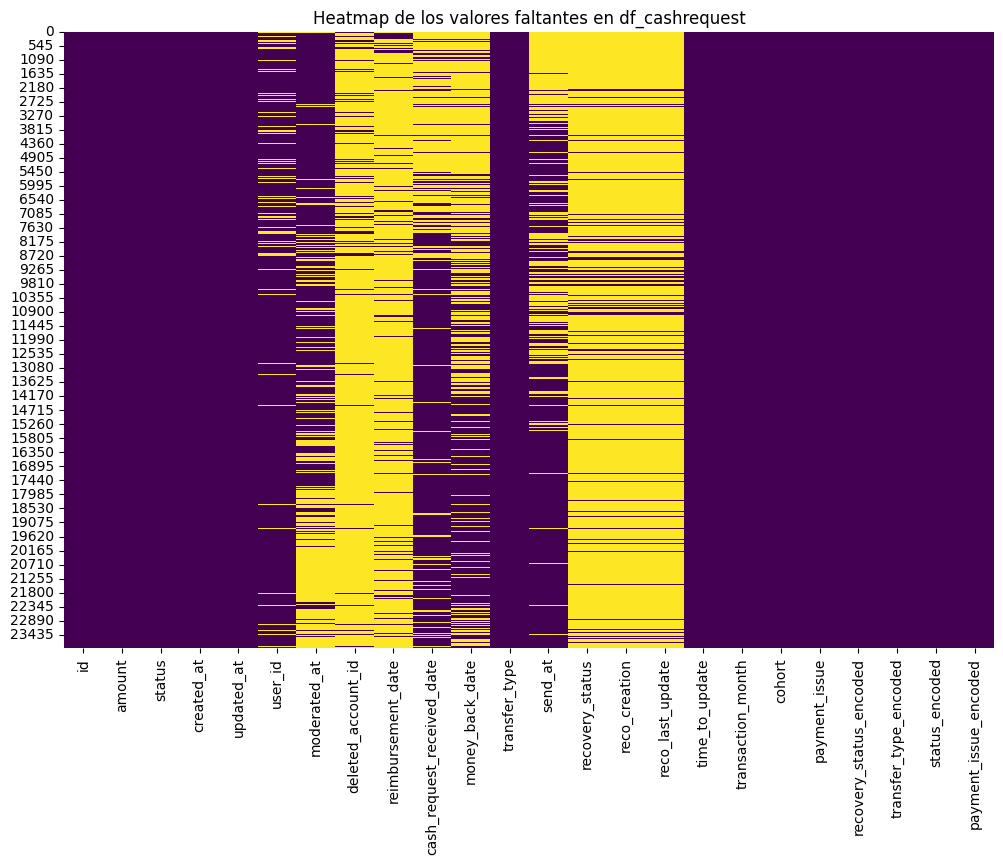

In [80]:
# Heatmap de valores faltantes
plt.figure(figsize=(12, 8))
sns.heatmap(df_cashrequest.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap de los valores faltantes en df_cashrequest")
plt.show()

In [79]:
# Guardar 'cashrequest_new' como 'cashrequest_new.csv'
cashrequest_new = df_cashrequest

cashrequest_new.to_csv('cashrequest_new.csv', index=False)
print("Los datos limpios han sido guardados como 'cashrequest_new.csv'")

NameError: name 'fees_new' is not defined